In [ ]:
!pip install supervision
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 24.7 MB/s eta 0:00:00


In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install git+https://github.com/ultralytics/ultralytics.git

  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-i2xhgi2r
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-i2xhgi2r
  Resolved https://github.com/ultralytics/ultralytics.git to commit cd6ef6105a3d43c8be70cd2d80aca4622d371a11
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5uJ6yAzsc27Y4fgn5PJj")
project = rf.workspace("mochoye").project("license-plate-detector-ogxxg")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model="/content/best_1.pt" data="/content/License-Plate-Detector-2/data.yaml" epochs=200 plots=True

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/best_1.pt, data=/content/License-Plate-Detector-2/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data="/content/License-Plate-Detector-2/data.yaml"

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/License-Plate-Detector-2/valid/labels.cache... 81 images, 0 backgrounds, 0 corrupt: 100% 81/81 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:02<00:00,  2.49it/s]
                   all         81         81      0.988      0.987      0.989      0.866
Speed: 4.5ms preprocess, 6.5ms inference, 0.1ms loss, 8.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
# # Get Bounding Box Predictions
from ultralytics import YOLO

path = "/content/imag_test1.jpg"

yolo_model = YOLO('/content/runs/detect/train/weights/best.pt')
bbox_results = yolo_model.predict(path, verbose=False)


In [ ]:
all_box_list = []
all_conf_list = []


for bbox_result in bbox_results:
    boxes = bbox_result.boxes
    box_list = []
    conf_list = []
    for box in boxes:
        box_data = box.data[0][:4]
        box_data = [int(x) for x in box_data]
        conf = round(float(box.conf), 2)
        if(conf>=0.5):
            box_list.append(box_data)
            conf_list.append(conf)

    all_box_list.append(box_list)
    all_conf_list.append(conf_list)

In [ ]:
all_conf_list

[[0.92]]

In [ ]:
# for i in bbox_results:
#   print(i.boxes)

print(all_box_list[0])
print(all_conf_list)


# for i, box in enumerate(boxes):
#   print(i, box)

[[95, 122, 178, 144]]
[[0.92]]


In [ ]:
ori_path = path
print(ori_path)
ori_image = cv2.imread(ori_path)
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

/content/imag_test1.jpg


In [ ]:
from ultralytics.utils.plotting import Annotator


annotator = Annotator(ori_image)
boxes = all_box_list
confs = all_conf_list

In [ ]:
for i in all_box_list[0]:
  print(i)

[95, 122, 178, 144]


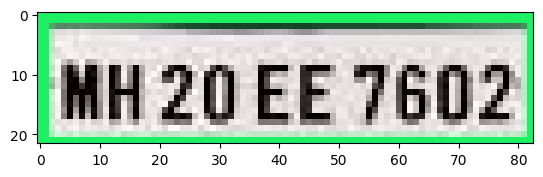

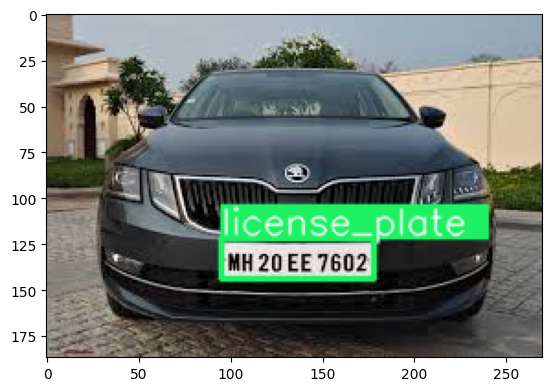

In [ ]:
import matplotlib.pyplot as plt

# for i, box in enumerate(boxes):
#   print(i)
box = all_box_list[0][0]
confs = 0.120
annotator.box_label(box=box, label="license_plate ", color=(30, 240, 100))

# Get Plate Object
x1, y1, x2, y2 = box
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
roi = ori_image[y1:y2, x1:x2]
plt.imshow(roi)
plt.show()

# Show Image
frame = annotator.result()
plt.imshow(frame)
plt.show()

In [ ]:
# # Get Bounding Box Predictions
from ultralytics import YOLO

path = "/content/car_video.mp4"

yolo_model = YOLO('/content/runs/detect/train/weights/best.pt')
bbox_results = yolo_model.predict(path, verbose=False)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



In [ ]:
all_box_list = []
all_conf_list = []


for bbox_result in bbox_results:
    boxes = bbox_result.boxes
    box_list = []
    conf_list = []
    for box in boxes:
        box_data = box.data[0][:4]
        box_data = [int(x) for x in box_data]
        conf = round(float(box.conf), 2)
        if(conf>=0.5):
            box_list.append(box_data)
            conf_list.append(conf)

    all_box_list.append(box_list)
    all_conf_list.append(conf_list)

In [ ]:
all_conf_list

[[0.85, 0.82, 0.55],
 [0.83, 0.82],
 [0.86, 0.83],
 [0.87, 0.78],
 [0.87, 0.82],
 [0.85, 0.84],
 [0.84, 0.83],
 [0.86, 0.84],
 [0.86, 0.82],
 [0.87, 0.73],
 [0.86, 0.75],
 [0.87, 0.86],
 [0.87, 0.85],
 [0.87, 0.85],
 [0.82, 0.81],
 [0.85],
 [0.86, 0.85],
 [0.86, 0.86],
 [0.88, 0.83],
 [0.88, 0.83],
 [0.84, 0.83],
 [0.84, 0.72],
 [0.84, 0.83],
 [0.84, 0.83],
 [0.77, 0.69],
 [0.84, 0.74],
 [0.6],
 [0.83, 0.8],
 [0.81, 0.64],
 [0.83, 0.81],
 [0.83, 0.74],
 [0.86, 0.82],
 [0.88, 0.83],
 [0.81, 0.81],
 [0.78, 0.57],
 [0.85, 0.83],
 [0.85, 0.82],
 [0.84],
 [0.83],
 [0.89, 0.78],
 [0.89, 0.69],
 [0.87, 0.68],
 [0.86, 0.79],
 [0.81, 0.8],
 [0.85, 0.78],
 [0.87, 0.78],
 [0.85, 0.77],
 [0.61],
 [],
 [0.75],
 [0.8],
 [],
 [],
 [0.64],
 [0.76],
 [0.78, 0.67],
 [0.81, 0.76],
 [0.68],
 [0.79, 0.76],
 [0.8, 0.75],
 [0.77, 0.51],
 [0.82, 0.79],
 [0.85, 0.65],
 [0.88, 0.75],
 [0.86, 0.78],
 [0.83, 0.57],
 [0.83, 0.72],
 [0.6],
 [0.83],
 [0.8],
 [0.78],
 [0.84],
 [0.75],
 [],
 [],
 [0.8],
 [0.79],
 [],


In [ ]:
# for i in bbox_results:
#   print(i.boxes)

print(all_box_list[0])
print(all_conf_list)


# for i, box in enumerate(boxes):
#   print(i, box)

[[231, 290, 348, 343], [1854, 611, 1919, 697], [1543, 130, 1919, 214]]
[[0.85, 0.82, 0.55], [0.83, 0.82], [0.86, 0.83], [0.87, 0.78], [0.87, 0.82], [0.85, 0.84], [0.84, 0.83], [0.86, 0.84], [0.86, 0.82], [0.87, 0.73], [0.86, 0.75], [0.87, 0.86], [0.87, 0.85], [0.87, 0.85], [0.82, 0.81], [0.85], [0.86, 0.85], [0.86, 0.86], [0.88, 0.83], [0.88, 0.83], [0.84, 0.83], [0.84, 0.72], [0.84, 0.83], [0.84, 0.83], [0.77, 0.69], [0.84, 0.74], [0.6], [0.83, 0.8], [0.81, 0.64], [0.83, 0.81], [0.83, 0.74], [0.86, 0.82], [0.88, 0.83], [0.81, 0.81], [0.78, 0.57], [0.85, 0.83], [0.85, 0.82], [0.84], [0.83], [0.89, 0.78], [0.89, 0.69], [0.87, 0.68], [0.86, 0.79], [0.81, 0.8], [0.85, 0.78], [0.87, 0.78], [0.85, 0.77], [0.61], [], [0.75], [0.8], [], [], [0.64], [0.76], [0.78, 0.67], [0.81, 0.76], [0.68], [0.79, 0.76], [0.8, 0.75], [0.77, 0.51], [0.82, 0.79], [0.85, 0.65], [0.88, 0.75], [0.86, 0.78], [0.83, 0.57], [0.83, 0.72], [0.6], [0.83], [0.8], [0.78], [0.84], [0.75], [], [], [0.8], [0.79], [], [0.82]

In [ ]:
import cv2

ori_path = path
print(ori_path)

# Use VideoCapture to load video files
cap = cv2.VideoCapture(ori_path)
ret, ori_image = cap.read()  # Read the first frame

# Check if the frame was read successfully
if ret:
    ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)
else:
    print("Error: Could not read frame from video.")

# Release the video capture object
cap.release()

/content/car_video.mp4


In [ ]:
from ultralytics.utils.plotting import Annotator

annotator = Annotator(ori_image)
boxes = all_box_list
confs = all_conf_list

In [ ]:
for i in all_box_list[0]:
  print(i)

[231, 290, 348, 343]
[1854, 611, 1919, 697]
[1543, 130, 1919, 214]


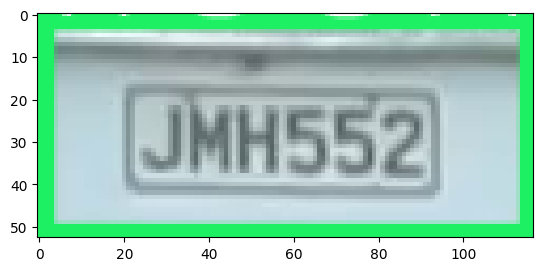

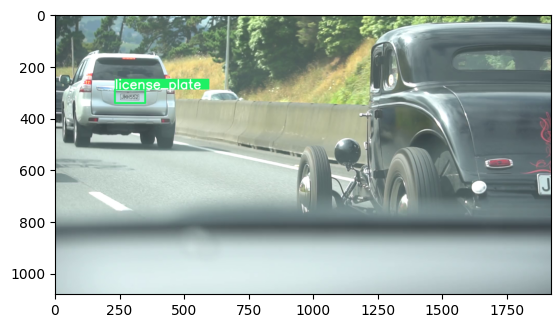

In [ ]:

import matplotlib.pyplot as plt

# for i, box in enumerate(boxes):
#   print(i)
box = all_box_list[0][0]
confs = 0.120
annotator.box_label(box=box, label="license_plate ", color=(30, 240, 100))

# Get Plate Object
x1, y1, x2, y2 = box
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
roi = ori_image[y1:y2, x1:x2]
plt.imshow(roi)
plt.show()

# Show Image
frame = annotator.result()
plt.imshow(frame)
plt.show()

In [25]:
# # Get Bounding Box Predictions
from ultralytics import YOLO

path = "/content/image.jpg"

yolo_model = YOLO('/content/runs/detect/train/weights/best.pt')
bbox_results = yolo_model.predict(path, verbose=False)


In [26]:
all_box_list = []
all_conf_list = []


for bbox_result in bbox_results:
    boxes = bbox_result.boxes
    box_list = []
    conf_list = []
    for box in boxes:
        box_data = box.data[0][:4]
        box_data = [int(x) for x in box_data]
        conf = round(float(box.conf), 2)
        if(conf>=0.5):
            box_list.append(box_data)
            conf_list.append(conf)

    all_box_list.append(box_list)
    all_conf_list.append(conf_list)

In [27]:
all_conf_list

[[0.84, 0.63]]

In [28]:
# for i in bbox_results:
#   print(i.boxes)

print(all_box_list[0])
print(all_conf_list)


# for i, box in enumerate(boxes):
#   print(i, box)

[[120, 427, 217, 453], [760, 405, 847, 426]]
[[0.84, 0.63]]


In [29]:
ori_path = path
print(ori_path)
ori_image = cv2.imread(ori_path)
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

/content/image.jpg


In [30]:
from ultralytics.utils.plotting import Annotator


annotator = Annotator(ori_image)
boxes = all_box_list
confs = all_conf_list

In [31]:
for i in all_box_list[0]:
  print(i)

[120, 427, 217, 453]
[760, 405, 847, 426]


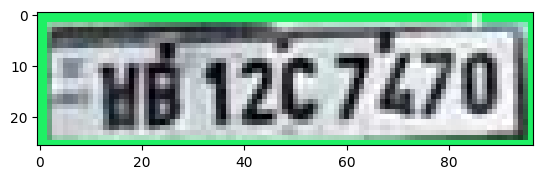

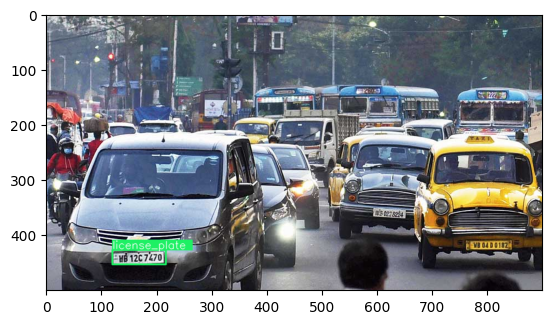

In [32]:
import matplotlib.pyplot as plt

# for i, box in enumerate(boxes):
#   print(i)
box = all_box_list[0][0]
confs = 0.120
annotator.box_label(box=box, label="license_plate ", color=(30, 240, 100))

# Get Plate Object
x1, y1, x2, y2 = box
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
roi = ori_image[y1:y2, x1:x2]
plt.imshow(roi)
plt.show()

# Show Image
frame = annotator.result()
plt.imshow(frame)
plt.show()